# Исследование эффективности рекламных затрат Яндекс.Афиши

План исследования:

1. Загрузка и подготовка данных
2. Исследование пользовательской активности
3. Исследование  продаж
4. Исследование затрат на рекламу и доходов от привлекаемых покупателей
5. Выводы

## Шаг 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
# Исходные таблицы
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

### Таблица visits

In [3]:
# Названия столбцов приведем к более удобному для работы виду
visits.columns =['device', 'end_ts', 'source_id', 'start_ts', 'uid']
# Приведем данные о начале и конце интернет-сессий к типу datetime
visits.end_ts = pd.to_datetime(visits.end_ts)
visits.start_ts = pd.to_datetime(visits.start_ts)

print(visits.info())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Таблица orders

In [4]:
# Переименуем столцы
orders.columns =['buy_ts', 'revenue', 'uid']
# Приведем данные о времени покупки к типу datetime
orders.buy_ts = pd.to_datetime(orders.buy_ts)

print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### Таблица  costs

In [5]:
# Данные о времени рекламных затрат приведем к типу datetime
costs.dt = pd.to_datetime(costs.dt)

print(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


В исходных таблицах не обнаружено пропущенных значений. Все данные приведены к нужным типам, столбцы переименованы так, чтобы с ними удобно было работать.

## Шаг 2. Отчеты и метрики

### Количество людей, пользующихся сервисом каждый месяц, каждую неделю, каждый день. С разбивкой по типам устройств.

In [6]:
# Добавим в таблицу визитов столбцы: год, месяц, неделю и день визита
visits['year'] = visits.start_ts.dt.year
visits['month'] = visits.start_ts.astype('datetime64[M]')
visits['week'] = visits.start_ts.dt.week
visits['day'] = visits.start_ts.dt.date
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


In [7]:
# Создадим срезы для устройств типа touch и устройств типа desktop
touch_users = visits.query('device == "touch"')
desktop_users = visits.query('device == "desktop"')

6825
16724


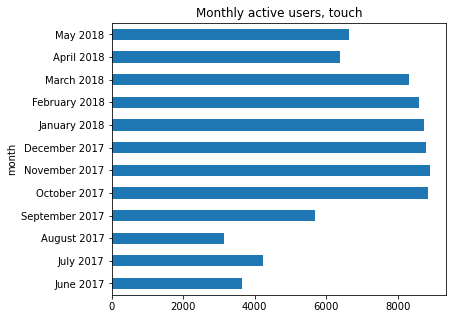

In [8]:
# Рассчитаем месячную активность пользователей (MAU) для обоих срезов
touch_users_per_month = touch_users.groupby('month').agg({'uid': 'nunique'})
desktop_users_per_month = desktop_users.groupby('month').agg({'uid': 'nunique'})
# Среднемесячная активность пользователей для обоих срезов
mean_touch_users_per_month = int(touch_users_per_month.uid.mean())
mean_desktop_users_per_month = int(desktop_users_per_month.uid.mean())
print(mean_touch_users_per_month)
print(mean_desktop_users_per_month)
# График активности пользователей в мобильных приложениях по месяцам
ax = touch_users_per_month.uid.plot(kind= 'barh', figsize = (6, 5))
plt.title('Monthly active users, touch')
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.show()

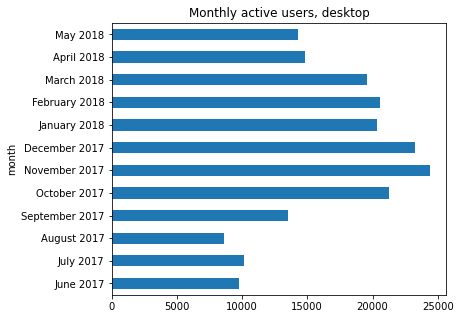

In [9]:
# График активности пользователей устройств типа desktop по месяцам
ax = desktop_users_per_month.uid.plot(kind= 'barh', figsize = (6, 5))
plt.title('Monthly active users, desktop')
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.show()

1634
4129


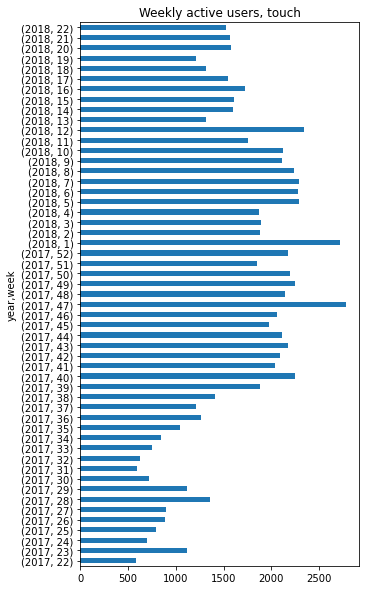

In [10]:
# Все то же для недель (WAU)
touch_users_per_week = touch_users.groupby(['year','week']).agg({'uid': 'nunique'})
mean_touch_users_per_week = touch_users_per_week.mean()
print(int(mean_touch_users_per_week))

desktop_users_per_week = desktop_users.groupby(['year','week']).agg({'uid': 'nunique'})
mean_desktop_users_per_week = desktop_users_per_week.mean()
print(int(mean_desktop_users_per_week))

# График активности пользователей в мобильных приложениях по неделям
ax = touch_users_per_week.uid.plot(kind = 'barh', figsize = (5, 10))
plt.title('Weekly active users, touch')
plt.show()

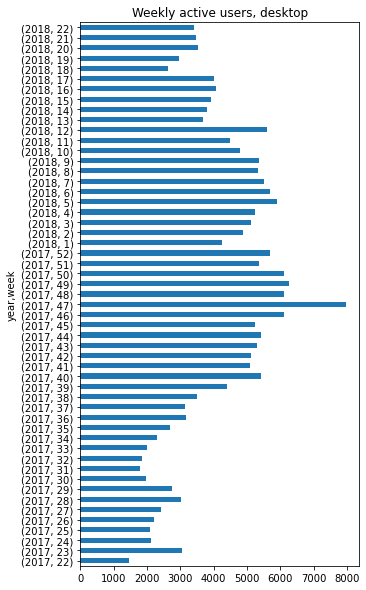

In [11]:
# График активности пользователей устройств типа desktop по неделям
ax = desktop_users_per_week.uid.plot(kind = 'barh', figsize = (5, 10))
plt.title('Weekly active users, desktop')
plt.show()

In [12]:
# Среднедневная активность (DAU)
mean_touch_users_per_day = touch_users.groupby('day').agg({'uid': 'nunique'}).mean()
print(int(mean_touch_users_per_day))
mean_desktop_users_per_day = desktop_users.groupby('day').agg({'uid': 'nunique'}).mean()
print(int(mean_desktop_users_per_day))

252
659


На сайт значительно чаще заходят с компьютера, чем с мобильного телефона. При этом графики показывают одни и те же тенденции и для пользователей стайионарных и для пользователей мобильных устройств. В целом, активность пользователей сильно зависит от сезона. Лето - "мертвый сезон". Осенью театральный сезон начинается, и наблюдается резкий рост активности: за лето все соскучились по спектаклям и концертам. Пик активности приходится на ноябрь. Видимо, в ноябре другие формы досуга не доступны. Для лыж рано, снега нет, солнца нет, листьев на деревьях нет - ничего нет, только и остается  что в театр или на концерт пойти. Зимой активнсть поменьше, но не сильно. Все же холодно, а лыжи не всем нравятся. В апредле становится интереснее и приятнее гулять на свежем воздухе, а концерты со спектаклями к тому времени слегка надоедают.

### Среднее количество сесий в день на одного пользователя по месяцам

In [13]:
# Посчитаем для месяцев и дней число сессий и число уникальных пользователей
sessions = visits.groupby(['month','day']).agg({'uid': ['count', 'nunique']}).reset_index()
sessions.set_axis(['month', 'day', 'sessions', 'users'], axis = 'columns', inplace=True)
# Почитаем количество сессий на одного пользователя
sessions['sess_per_user'] = sessions['sessions'] / sessions['users']
display(sessions.head())

,month,day,sessions,users,sess_per_user
0,2017-06-01,2017-06-01,664,605,1.097521
1,2017-06-01,2017-06-02,658,608,1.082237
2,2017-06-01,2017-06-03,477,445,1.071910
3,2017-06-01,2017-06-04,510,476,1.071429
4,2017-06-01,2017-06-05,893,820,1.089024


In [14]:
# Посчитаем среднее число сессий на пользователя для каждого месяца
sessions_grouped = sessions.groupby('month').agg({'sess_per_user':'mean'})
display(sessions_grouped)

,sess_per_user
month,
2017-06-01,1.073938
2017-07-01,1.077657
2017-08-01,1.066927
2017-09-01,1.076044
2017-10-01,1.077773
2017-11-01,1.093053
2017-12-01,1.090265
2018-01-01,1.085976
2018-02-01,1.089924


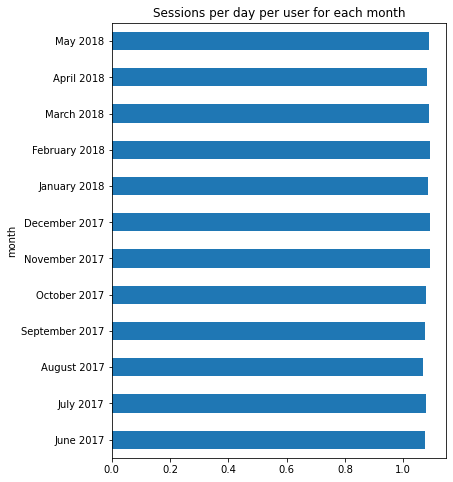

In [15]:
# Визуализируем результат
ax = sessions_grouped.sess_per_user.plot(kind = 'barh', figsize =(6, 8))
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.title('Sessions per day per user for each month')
plt.show()

In [16]:
print(sessions_grouped.sess_per_user.mean())

1.0822094906655846


Среднее количество сессий, приходящихся на одного пользователя, от месяца к месяцу практически не меняется. Среднее количество сессий за весь исследуемый период составляет 1.08, а средние значения по месяцам колюблются в диапазоне 1.06 - 1.09.

### Сколько в среднем длится одна сессия

In [17]:
# Посчитаем, сколько минут длится средняя сессия
visits['session_minutes'] = ((visits.end_ts - visits.start_ts) / np.timedelta64(1, 'm')).astype('int')

# Среднее, медиана и мода
print(visits.session_minutes.mean())
print(visits.session_minutes.median())
print(int(visits.session_minutes.mode()))
display(visits.head())

10.716329994435169
5.0
1


,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,28
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0


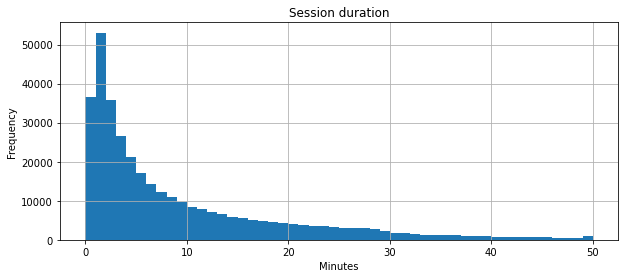

In [18]:
# Визуализируем результат
ax = visits.session_minutes.hist(range=(0, 50), bins=50, figsize = (10, 4))
ax.set_xlabel('Minutes')
ax.set_ylabel('Frequency')
plt.title('Session duration')
plt.show()

Наиболее типичная сессия длится от 1 до 10 минут. Сессии, длящиеся более получаса, очень редки.
Чаще всего встречается значение "1 минута", при этом половина всех сессий длится в пределах пяти минут. Среднее значение (10 минут) смещено из=за выбросов и редких значений.

### Retention rate

In [19]:
# Посчитаем минимальное значение start_ts (время первого визита) для каждого пользователя
first_visits = visits.groupby('uid').agg({'start_ts': 'min'})
first_visits.columns = ['first_visit']
# Выделим месяц первого визита
first_visits['first_visit_month'] = first_visits.first_visit.astype('datetime64[M]')
display(first_visits.head())

,first_visit,first_visit_month
uid,,
11863502262781,2018-03-01 17:27:00,2018-03-01
49537067089222,2018-02-06 15:55:00,2018-02-01
297729379853735,2017-06-07 18:47:00,2017-06-01
313578113262317,2017-09-18 22:49:00,2017-09-01
325320750514679,2017-09-30 14:29:00,2017-09-01


In [20]:
# Объединим таблицы визитов и первых визитов
visits = visits.merge(first_visits, on = 'uid')
# Посчитаем текущее время жизни пользователя для каждого наблюдения таблицы visits
visits['lifetime'] = ((visits.month - visits.first_visit_month) / np.timedelta64(1, 'M')).round().astype('int')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes,first_visit,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,18,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,28,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0


In [21]:
# Сгруппируем уникальных пользователей по когортам (месяцу первого визита) и времени жизни
cohorts = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
display(cohorts.head(10))

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


In [22]:
# Создадим срез таблицы когорт: нам нужно изначальное количество пользователей в каждой когорте
initial_users_count = cohorts[cohorts.lifetime == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
display(initial_users_count)

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [23]:
# Объединим таблицу когорт с ее срезом, а затем вычислим retention rate, разделив
# текущее количество пользователей на изначальное и умножив на 100 процентов.

cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts['retention_rate'] = (cohorts.uid / cohorts.cohort_users * 100).round(2)
display(cohorts.head(10))

,first_visit_month,lifetime,uid,cohort_users,retention_rate
0,2017-06-01,0,13259,13259,100.00
1,2017-06-01,1,1043,13259,7.87
2,2017-06-01,2,713,13259,5.38
3,2017-06-01,3,814,13259,6.14
4,2017-06-01,4,909,13259,6.86
5,2017-06-01,5,947,13259,7.14
6,2017-06-01,6,809,13259,6.10
7,2017-06-01,7,766,13259,5.78
8,2017-06-01,8,694,13259,5.23
9,2017-06-01,9,674,13259,5.08


In [24]:
# Сводная таблица retention rate для каждого лайфтайма каждой когорты
retention_rate_pivot = cohorts.pivot_table(index = 'first_visit_month', columns = 'lifetime', values = 'retention_rate')
display(retention_rate_pivot)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,100.0,7.87,5.38,6.14,6.86,7.14,6.10,5.78,5.23,5.08,4.07,4.5
2017-07-01,100.0,5.61,5.13,5.62,5.82,4.82,4.54,4.57,3.88,2.86,2.75,NaN
2017-08-01,100.0,7.69,6.29,6.28,5.01,4.40,3.63,3.95,2.79,2.60,NaN,NaN
2017-09-01,100.0,8.55,6.92,5.07,3.94,3.78,3.59,2.42,2.28,NaN,NaN,NaN
2017-10-01,100.0,7.86,5.22,3.90,3.43,3.22,2.14,2.04,NaN,NaN,NaN,NaN
2017-11-01,100.0,7.83,4.41,3.87,3.37,2.34,2.18,NaN,NaN,NaN,NaN,NaN
2017-12-01,100.0,5.58,3.80,3.11,2.03,1.90,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,100.0,5.97,3.93,2.50,2.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,100.0,5.71,2.55,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


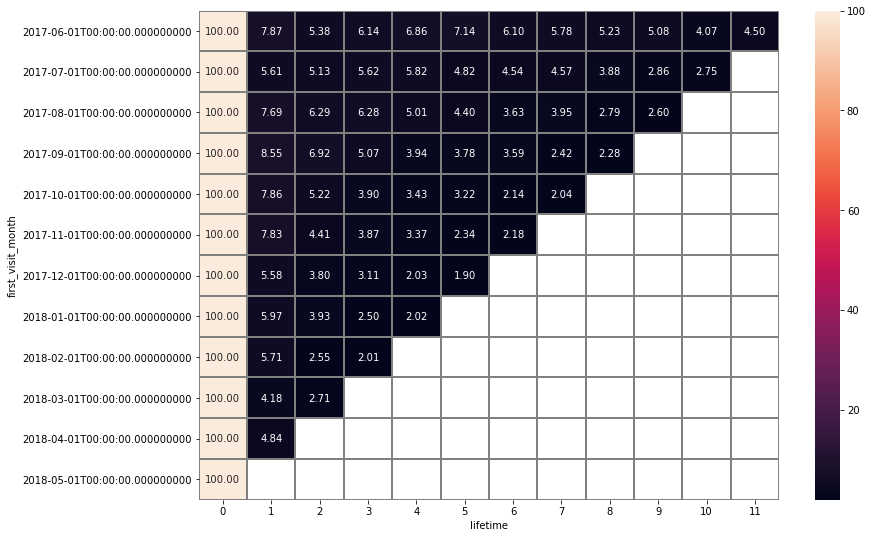

In [25]:
# Тепловая карта по сводной таблице retention rate
plt.figure(figsize = (13, 9))
sns.heatmap(retention_rate_pivot, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'gray')
plt.show()

Коэффициент удержания очень низкий. Ни разу не достиг и 10 процентов. На тепловой карте преобладают темно-фиолетовый и черный цвета.

### Продажи. Время между первым визитом и первой покупкой

In [26]:
# Создадим список id покупателей
buyers = orders.uid.unique()
print(len(buyers))

36523


In [27]:
# Сделаем срез таблицы visits по списку покупателей
# (т.е. избавимся от тех, кто так и не совершил ни одной покупки)
visits_of_buyers = visits.query('uid in @buyers').reset_index(drop=True)
display(visits_of_buyers.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes,first_visit,first_visit_month,lifetime
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,1,2017-09-03 21:35:00,2017-09-01,0
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,2017-10-01,43,2017-10-27,42,2017-09-03 21:35:00,2017-09-01,1
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,2017-09-01,36,2017-09-04,19,2017-09-03 21:35:00,2017-09-01,0


In [28]:
# Найдем время первого визита каждого покупателя
buyers_first_visits = visits_of_buyers.groupby('uid').agg({'first_visit': 'first'}).reset_index()
display(buyers_first_visits.head())

,uid,first_visit
0,313578113262317,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00


In [29]:
# Найдем время первой покупки каждого покупателя
first_purchases = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchases = first_purchases.rename(columns = {'uid': 'uid', 'buy_ts': 'first_purchase_time'})
display(first_purchases.head())

,uid,first_purchase_time
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [30]:
# Соединим таблицы времени первых покупок и первых визитов покупателей
first_purchases = first_purchases.merge(buyers_first_visits, on = 'uid')
display(first_purchases.head())

,uid,first_purchase_time,first_visit
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [31]:
# Посчитаем разницу между временем первой покупки и временем первого визита в минутах
first_purchases['minutes_to_purchase'] = ((first_purchases.first_purchase_time - first_purchases.first_visit) / np.timedelta64(1, 'm')).astype('int')
display(first_purchases.head())

,uid,first_purchase_time,first_visit,minutes_to_purchase
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


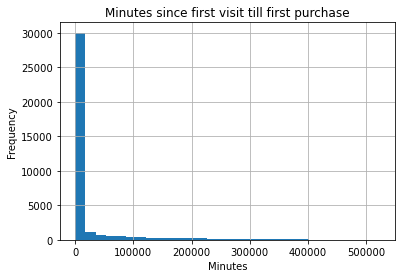

In [32]:
# Визуализируем результат: построим гистограмму, иллюстрирующую распределение
# значений длительности времени  с момента первого захода покупателя на сайт до первой его покупки
ax = first_purchases.minutes_to_purchase.hist(bins = 30)
ax.set_xlabel("Minutes")
ax.set_ylabel('Frequency')
plt.title("Minutes since first visit till first purchase")
plt.show()

In [33]:
# Мода, среднее и медиана
print(int(first_purchases.minutes_to_purchase.mode()))
print(first_purchases.minutes_to_purchase.mean())
print(first_purchases.minutes_to_purchase.median())

1
24340.175834405716
16.0


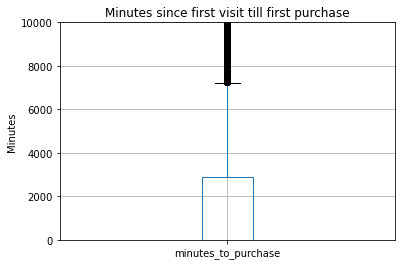

In [34]:
# Диаграмма размаха, иллюстрирующая в каком диапазоне распределилась большая часть значений
# времени между первым визитом на сайт и покупкой
ax = first_purchases.boxplot(column = 'minutes_to_purchase')
ax.set_ylim(0, 10000)
ax.set_ylabel('Minutes')
plt.title("Minutes since first visit till first purchase")
plt.show()

Половина всех покупателей совершают покупки в течение первых 16 минут, и самое частое значение - в течение одной минуты (это, видимо, те покупатели, которые изначально знают, что хотят купить и с этой целью идут на сайт). Три четверти покупателей, как видно на диаграмме размаха, совершают покупки в течение 3000 минут (т.е. в течение примерно двух дней). Значит, мало кто заходит на сайт проосто так посмотреть, что там продается. В основном сервис интересен не как афиша, а как билетная касса.

### Количество покупок по месяцам

In [35]:
# Добавим столбцы года месяца и недели в таблицу orders
orders['year'] = orders.buy_ts.dt.year
orders['month'] = orders.buy_ts.dt.month
orders['week'] = orders.buy_ts.dt.week
# Сгруппируем по году и месяцу. Посчитаем количество покупок.
purchases_per_month = orders.groupby(['year', 'month']).agg({'revenue': 'count'})
purchases_per_month = purchases_per_month.rename(columns = {'year': 'year', 'month': 'month', 'revenue': 'num_purchases'})
display(purchases_per_month)

num_purchases
year month               
2017 6               2354
     7               2363
     8               1807
     9               3387
     10              5679
     11              5659
     12              6218
2018 1               4721
     2               5281
     3               5326
     4               3273
     5               4346
     6                  1

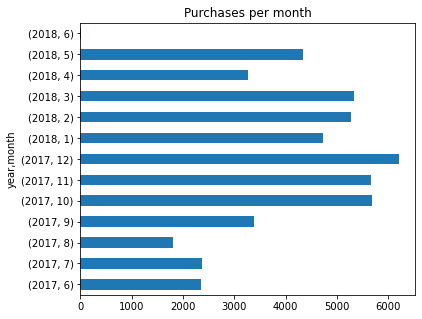

In [36]:
# Визуализируем результат
purchases_per_month.num_purchases.plot(kind = 'barh', figsize = (6, 5))
plt.title('Purchases per month')
plt.show()

In [37]:
# Среднее и медиана
print(purchases_per_month.num_purchases.median())
print(purchases_per_month.num_purchases.mean())

4346.0
3878.076923076923


Покупки так же зависят от сезона, как и посещение сайта. Пик наблюдается в районе октября-декабря, летом - мертвый сезон. В то же время можно отметить рост числа покупок в мае по сравнению с апрелем - при том, что посещаемость сайта наоборот упала. То же явление, хотя и менее выраженное, можно наблюдать для пары январь-февраль (визитов столько же, но покупок в феврале больше) и для пары ноябрь-декабрь (в декабре визитов было меньше, а покупок больше, чем в ноябре). Трудно понять, случайность это или тенденция к росту конверсии посетиелей в покупателей. Для того, чтобы разобраться в этом, наверное, нужно сравнивать год к году - апрель к апрелю, май к маю итд.

### Средний чек

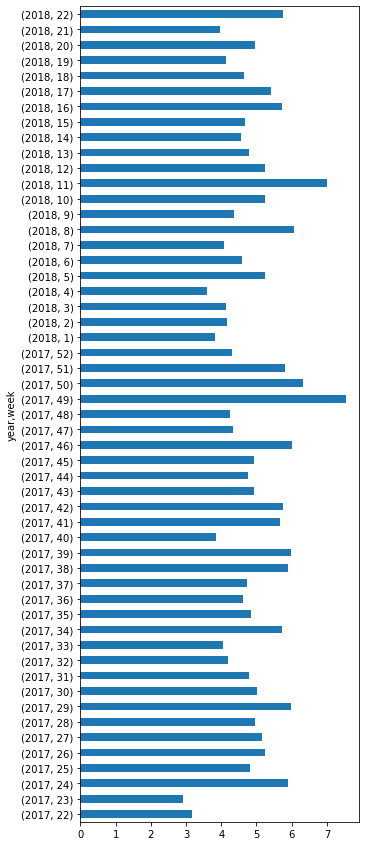

In [38]:
# Таблица для еженедельного среднего чека
revenue_by_week = orders.groupby(['year', 'week']).agg({'revenue': 'mean'})
# График
revenue_by_week.revenue.plot(kind = 'barh', figsize = (5, 15))
plt.show()

In [39]:
# Средний чек за весь период
print(revenue_by_week.revenue.mean())

4.951729086547415


Средний чек больше в осенние и зимние недели, при этом в другое время тоже случаются свои локальные пики. Например, 24-я неделя (середина июня), 29-я (июль). Вероятно, это связано с какими-нибудь популярными событиями (вроде фестивалей или гастролей итп.).

### LTV в зависимости от рекламного источника

In [40]:
# Получим таблицу рекламных источников для каждого покупателя
users_sources = visits_of_buyers.groupby('uid').agg({'source_id': 'first'})
display(users_sources.head())

,source_id
uid,
313578113262317,2
1575281904278712,10
2429014661409475,3
2464366381792757,5
2551852515556206,5


In [41]:
# Получим таблицу суммарных доходов с каждого покупателя за весь период
revenue_per_buyer = orders.groupby('uid').agg({'revenue': 'sum'})
display(revenue_per_buyer.head())
# LTV без разбивки по источникам
print(revenue_per_buyer.revenue.mean())

,revenue
uid,
313578113262317,0.55
1575281904278712,3.05
2429014661409475,73.33
2464366381792757,2.44
2551852515556206,10.99


6.901327930345157


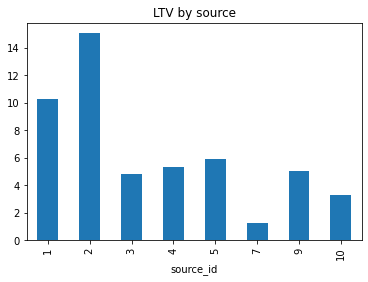

In [42]:
# Объединим таблицы источников и доходов
revenue_per_buyer = revenue_per_buyer.merge(users_sources, on='uid')
# Вычислим средний доход с покупателя для каждого рекламного источника (LTV в зависимости от источника)
revenue_per_buyer_by_source = revenue_per_buyer.groupby('source_id').agg({'revenue': 'mean'})
# График
revenue_per_buyer_by_source.revenue.plot(kind = 'bar')
plt.title('LTV by source')
plt.show()

In [43]:
# Сверим результат с полным списком источников
print(visits.source_id.unique())

[ 4  2  5  9  3  1 10  7  6]


Средний доход от пользователя разный для разных рекламных источников. Так, максимальный доход от пользователя обеспечивает рекламный источник №2 - 15 рублей. Источник № 7 приносит минимальный доход с пользователя - 1 рубль. А источник № 6, который есть в таблице visits, не привлек ни одного покупателя и не попал в статистику по источникам покупателей. Средний доход от покупателя без привязки к источнику - 7 рублей.

## Маркетинг

In [44]:
# Сколько денег всего потратили на рекламу?
total_costs = costs.costs.sum()
print(total_costs)

329131.62


In [45]:
# Сколько денег потратили на рекламу в разных источниках?
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
display(costs_by_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


### Траты на рекламу по месяцам и неделям 

In [46]:
# Добавим столбцы года, месяца и недели в таблицу costs
costs['year'] = costs['dt'].dt.year
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.week
display(costs.head())

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017,6,22
1,1,2017-06-02,62.25,2017,6,22
2,1,2017-06-03,36.53,2017,6,22
3,1,2017-06-04,55.00,2017,6,22
4,1,2017-06-05,57.08,2017,6,23


In [47]:
# Создадим сводную таблицу, где наблюдения - месяцы, столбцы - источники, значения - средние расходы
monthly_costs_per_source = costs.pivot_table(index = ['year', 'month'], columns = 'source_id', values = 'costs', aggfunc = 'mean')
display(monthly_costs_per_source)

source_id          1           2           3           4           5   \
year month                                                              
2017 6      37.520333   80.912667  257.721667  117.160000   87.204000   
     7      34.609032   75.261613  247.560323  113.862258   96.714194   
     8      30.703548   58.420968  198.178710  103.785806   70.492903   
     9      50.067000   99.522000  332.118333  173.075333  128.304667   
     10     74.701613  156.290323  507.652903  207.123871  186.045161   
     11     81.505333  174.922667  567.511333  179.627333  210.844667   
     12     75.522581  157.993548  523.210323  247.757097  189.436129   
2018 1      70.521935  134.120645  477.702581  188.154516  173.274839   
     2      78.731429  159.797857  508.162857  203.998571  181.118214   
     3      63.103000  131.438000  436.028333  198.729000  146.116774   
     4      45.775517  103.231034  320.579655  152.016897  120.729310   
     5      47.342258   86.756129  303.594194  135.942258  118.372903   

source_id          9          10  
year month                        
2017 6       9.507333  10.474000  
     7       9.759355  10.639355  
     8       8.030000   7.502258  
     9      13.854000  15.355667  
     10     19.658387  20.233548  
     11     22.772667  26.412000  
     12     21.225161  20.834194  
2018 1      17.650323  19.817742  
     2      19.696429  17.174286  
     3      16.009667  17.547000  
     4      12.878966  13.387931  
     5      11.682903  13.221290

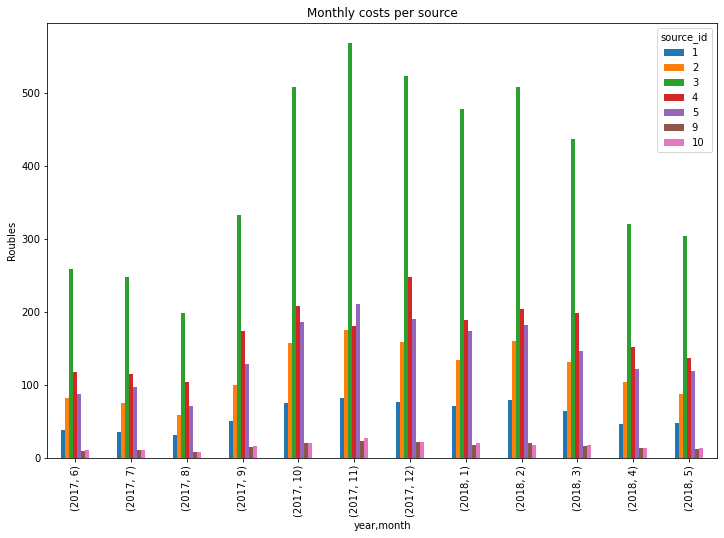

In [48]:
# График расходов на разные рекламные источники по месяцам
ax = monthly_costs_per_source.plot(kind = 'bar', figsize = (12,8))
ax.set_ylabel("Roubles")
plt.title('Monthly costs per source')
plt.show()

На графике хорошо видно, что особенно выделяются расходы на источник 3. Это не просто самый дорогой источник, но его стоимость в разы превышает траты на любой другой.

In [49]:
# Посчитаем затраты на рекламу по месяцам и неделям
costs_by_month = costs.groupby(['year', 'month']).agg({'costs': 'sum'})
costs_by_week = costs.groupby(['year', 'week']).agg({'costs': 'sum'})

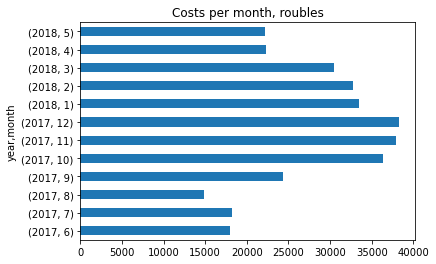

In [50]:
# График для месяцев
costs_by_month.costs.plot(kind = 'barh')
plt.title('Costs per month, roubles')
plt.show()

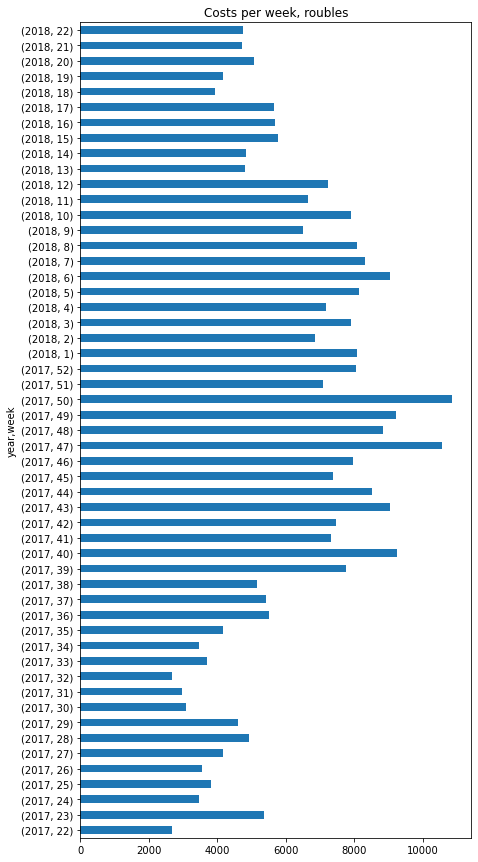

In [51]:
# График для недель
costs_by_week.costs.plot(kind = 'barh', figsize =(7, 15))
plt.title('Costs per week, roubles')
plt.show()

### CAC по источникам

In [52]:
# Посчитаем количество привлеченных каждым источником покупателей
buyers_by_source = visits_of_buyers.groupby('source_id').agg({'uid': 'nunique'})
buyers_by_source = buyers_by_source.rename(columns = {'source_id': 'source_id', 'uid': 'num_users'})
display(buyers_by_source)

,num_users
source_id,
1,7138
2,7305
3,13846
4,14253
5,10156
7,1
9,2793
10,1773


In [53]:
display(costs_by_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [54]:
# Объединим таблицы источников покупателей и трат на каждый источник
costs_and_buyers = buyers_by_source.merge(costs_by_source, on = 'source_id')
# Посчитаем, сколько денег тратится на привлечение одного покупателя каждым источником
costs_and_buyers['costs_per_buyer'] = costs_and_buyers.costs / costs_and_buyers.num_users
display(costs_and_buyers)

,source_id,num_users,costs,costs_per_buyer
0,1,7138,20833.27,2.918642
1,2,7305,42806.04,5.859828
2,3,13846,141321.63,10.206676
3,4,14253,61073.60,4.284965
4,5,10156,51757.10,5.096209
5,9,2793,5517.49,1.975471
6,10,1773,5822.49,3.283976


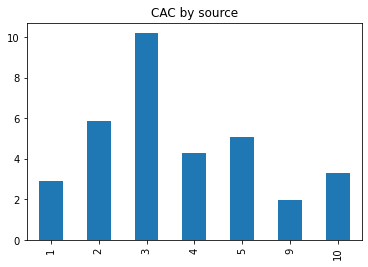

In [55]:
# График
ax = costs_and_buyers.costs_per_buyer.plot(kind = 'bar')
ax.set_xticklabels([tick for tick in costs_and_buyers.source_id])
plt.title('CAC by source')
plt.show()

In [56]:
# Средний CAC за весь период
cac = costs_and_buyers.costs_per_buyer.mean()
print(cac)

4.803680914859963


В среднем расходы на рекламную кампанию ниже, чем доходы. Но есть одно исключение: затраты на источник № 3 больше, чем доходы от него.

### Стоимость привлечения одного покупателя для каждого рекламного источника по месяцам

In [57]:
# Посчитаем для каждой пары месяц-источник количество уникальных покупателей
buyers_by_source_per_month = visits_of_buyers.groupby(['source_id', 'month']).agg({'uid':'nunique'}).reset_index()
buyers_by_source_per_month = buyers_by_source_per_month.rename(columns = {'source_id': 'source_id', 'month': 'month', 'uid': 'num_users'})
display(buyers_by_source_per_month.head(10))

,source_id,month,num_users
0,1,2017-06-01,406
1,1,2017-07-01,437
2,1,2017-08-01,332
3,1,2017-09-01,594
4,1,2017-10-01,911
5,1,2017-11-01,1161
6,1,2017-12-01,1158
7,1,2018-01-01,848
8,1,2018-02-01,841
9,1,2018-03-01,915


In [58]:
# посчитаем расходы для пары источник-месяц
costs_grouped = costs.groupby(['source_id', 'year', 'month']).agg({'costs': 'sum'})
display(costs_grouped.head())

costs
source_id year month         
1         2017 6      1125.61
               7      1072.88
               8       951.81
               9      1502.01
               10     2315.75

In [59]:
# Соединим таблицы количества покупаелей и суммарных расходов для пары источник-месяц
costs_and_buyers_per_month = costs_grouped.merge(buyers_by_source_per_month, on = 'source_id', how = 'left')
display(costs_and_buyers_per_month.head(10))

,source_id,costs,month,num_users
0,1,1125.61,2017-06-01,406
1,1,1125.61,2017-07-01,437
2,1,1125.61,2017-08-01,332
3,1,1125.61,2017-09-01,594
4,1,1125.61,2017-10-01,911
5,1,1125.61,2017-11-01,1161
6,1,1125.61,2017-12-01,1158
7,1,1125.61,2018-01-01,848
8,1,1125.61,2018-02-01,841
9,1,1125.61,2018-03-01,915


In [60]:
# Посчитаем в получившейся таблице столбец "расходы на покупателя"
costs_and_buyers_per_month['costs_per_buyer'] = costs_and_buyers_per_month.costs / costs_and_buyers_per_month.num_users
display(costs_and_buyers_per_month.head())

,source_id,costs,month,num_users,costs_per_buyer
0,1,1125.61,2017-06-01,406,2.772438
1,1,1125.61,2017-07-01,437,2.575767
2,1,1125.61,2017-08-01,332,3.390392
3,1,1125.61,2017-09-01,594,1.894966
4,1,1125.61,2017-10-01,911,1.235576


In [61]:
# Создадим сводную таблицу, где месяц - наблюдение, источники - столбцы, а значения - стоимость одного покупателя
costs_pivot = costs_and_buyers_per_month.pivot_table(index = 'month', columns = 'source_id', values = 'costs_per_buyer')
display(costs_pivot)

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,4.276123,6.953548,12.229286,6.924444,7.261097,2.568664,3.790684
2017-07-01,3.972782,6.485764,14.309602,5.911111,6.399246,2.838215,6.469433
2017-08-01,5.229234,9.076768,19.726637,8.426269,7.620303,2.189480,8.223856
2017-09-01,2.922737,5.207547,9.512765,4.847111,4.437337,1.810200,4.219196
2017-10-01,1.905714,3.202127,6.520932,2.563963,2.896636,1.259701,1.810476
2017-11-01,1.495354,2.698313,6.036290,2.237128,3.757048,0.840568,2.256779
2017-12-01,1.499228,2.813226,6.086203,2.128593,3.335724,1.089552,4.043396
2018-01-01,2.047295,3.538859,7.351312,2.685734,4.123415,1.222848,3.051619
2018-02-01,2.064335,3.483564,7.378949,2.663248,3.606264,1.259701,2.438229


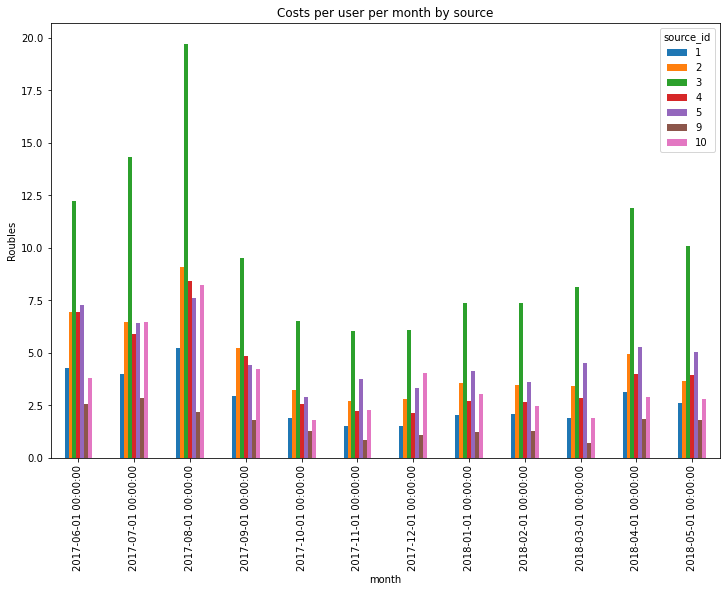

In [62]:
# Построим график по сводной таблице
ax = costs_pivot.plot(kind = 'bar', figsize = (12, 8))
ax.set_ylabel('Roubles')
plt.title('Costs per user per month by source')
plt.show()

График по стоимости привлечения одного покупателю по отдельным источникам по месяцам также показывает, что особенно затратным является истчник 3.

### ROI  по источникам

In [63]:
# Объединим таблицы расходов и доходов на покупателей по источникам
costs_and_revenue = costs_and_buyers.merge(revenue_per_buyer_by_source, on = 'source_id')
# Посчитаем ROI в процентах от расходов
costs_and_revenue['roi'] = 100 * (costs_and_revenue.revenue - costs_and_revenue.costs_per_buyer) / costs_and_revenue.costs_per_buyer
display(costs_and_revenue)

,source_id,num_users,costs,costs_per_buyer,revenue,roi
0,1,7138,20833.27,2.918642,10.301913,252.969334
1,2,7305,42806.04,5.859828,15.071076,157.193161
2,3,13846,141321.63,10.206676,4.849823,-52.483816
3,4,14253,61073.60,4.284965,5.342538,24.681029
4,5,10156,51757.10,5.096209,5.901142,15.794737
5,9,2793,5517.49,1.975471,5.001399,153.175053
6,10,1773,5822.49,3.283976,3.312925,0.881515


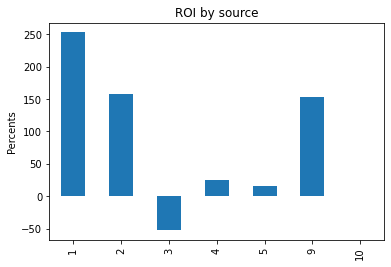

In [64]:
# График
ax = costs_and_revenue.roi.plot(kind = 'bar')
ax.set_xticklabels([tick for tick in costs_and_buyers.source_id])
ax.set_ylabel('Percents')
plt.title('ROI by source')
plt.show()

Наибольший возврат на инвестиции дает источник №1. Каждый вложенный рубль приносит два с половиной прибыли. Достаточно выгодны и источники 2 и 9 - по полтора рубля прибыли на каждый вложенный. Четвертый и пятый источники приносят по нескольку десятков копеек на вложенный рубль. Третий источник приносит убыток: от каждого вложенного рубля не получается вернуть и пятидесяти копеек.

## Шаг 3. Выводы

Исследование активности пользователей сервиса показало, что она зависит от сезона. Длительность большей части сессий достаточно коротка (1-10 минут), и промежуток времени между первым заходом на сайт и первой покупкой - тоже (медианное значение - 16 минут). Это, видимо, говорит о том, что сервис интересен пользователям в первую очередь как билетная касса, а не как афиша: пользователи знают, что хотят купить, до обращения к сервису.

Retention rate довольно низкий: не превышает 9 процентов. Нужны дополнительные исследования, которые бы объяснили это.

Советы маркетологам:
1. Больше задействовать источники № 1, 2 и 9: они дают наибольший возврат на инвестиции
2. Не использовать источник № 3 - от него один убыток (или, если возможно сделать это не теряя привлекаемых пользователей, сильно сократить на него расходы).

Возможно, нужно исследовать данные за несколько лет, чтобы учитывать фактор сезонности, который очень важен в данном случае, как показали многие графики в этом исследовании. Без учета сезонности трудно говорить о том, стали ли дела идти лучше или хуже к концу исследуемого периода.